# ECON4422/8022 Macroeconomic Theory

### Tutorial 1

Simon Mishricky

Office Number: 2115

ANU email: u5009764@anu.edu.au

__Working with Python__

Python is a high level programming language, this means that its focus is on interprebility. It is closer to the humans understanding than the computer. This can come at the cost of processing speed. This is certainly true in the case of Python, however, since Python is such a popular programming language, tools have been developed to restore the processing speed.

Pythons focus on interpretability means that the Python community are strict with what they refer to as "clean code". As a result the developers of Python have written a style guide which is used across the board, a link is provided below:

[PEP8](https://www.python.org/dev/peps/pep-0008/)

PEP8 provides all of the information about how to write and layout your code. Writting your code in this way will help others understand what you are trying to do and help you when you need to debug your code.

This course will provide the basics of Python programming as well introduce some of the algorithms used in modern macroeconomics. This course is self contained, however if you require further resouces some links are provided below:

[Beginner's Guide to Python](https://wiki.python.org/moin/BeginnersGuide)

[QuantEcon](https://lectures.quantecon.org/py/)

[Code Academy](https://www.codecademy.com/learn/learn-python-3)

__Work Flow__

A typical easy to read Python program usually flows in the following way:

- Import your packages and libraries
   - Packages are sets of tools developed by other programers, that have been avaliable to use
   - Common packages include NumPy, Matplotlib and SciPy
- List your parameters
- Write out your functions
- Develop your algorithm

Exercise 0 provides a usefull example of good work flow

#### Exercise 0

The Solow-Swan growth model.

A closed economy has a per-worker technology that take per-worker capital $k_t$ avaliable at the begining of date $t$ and produces $y_t = A_t k_t^\alpha$ units of output per worker (note labour has been nominalised to 1). The variable $A_t$ is exogenous technology that follows some law of motion. The paramter $\alpha \in (0,1)$ is the capital share of income.

Capital per worker evolves according to the technology:
$$k_{t+1} = (1 - \delta)k_t + sy_t$$
Where $\delta \in [0, 1]$ and $s \in (0,1)$ are the depreciation rate and the savings rate, respectively.
This states that next period capital is constituted by the undepreciated capital of this period and the amount of output saved.

1. Show that the above capital accumulation equation has a recursive structure
2. Calculate a constant (steady-state) value $k > 0$ such that it satifies the dynamic equilibrium condition of the model
3. Assume that $A_t =1$, a constant, $\alpha = 0.33, \space s = 0.20$ and $\delta = 010$. Plot the graphs of $\{(k, h(k)) \in \mathbb{R}^2_+ : h(k) := (1 - \delta)k + sk^\alpha\}$ and $\{(k, z(k)) \in \mathbb{R}^2_+: z(k) = k\}$ in $(k_t, k_{t + 1})$ space. Then plot the trajectory of the economy begining from an arbitrary initial state $(k_0 = 0.01)$ in the same diagram. 

#### Answers

1. Plug the expression of the production function $y = Ak^\alpha$ into the capital accumulation technology to get: $$ k_{t + 1} = (1 - \delta)k_t + s_t A_t k_t^\alpha $$ Thus we have $k_{t + 1} = T(k_t)$, meaning that $k_{t + 1}$ can be written in terms of a function of $k_t$

2. Finding the steady state of $k$, means finding the fixed point of $T$. A fixed point of a function, say $T$, is an element in the domain which is mapped into itself, e.g. $T(x) = x$. We can solve this problem and calculate the fixed point in two ways, namely, analytically and numerically.


- Analytic solution
    
    We can solve for the fixed point by allowing $k_{t + 1} = k_t = k$ where $k$ is the steady state level of capital.
    
    $$k = T(k)$$
    
    $$k = (1 - \delta)k + s A k^\alpha$$
    
    Note that straight away, we can see that $k = 0$ is a fixed point, however, this implies zero production, so we are not interested in this case. As for the non-trivial case:
    
    $$\delta k = s A k^\alpha$$
    
    $$k = \left(\frac{sA}{\delta}\right)^{\frac{1}{1 - \alpha}}$$
    
    We can calculate $k$ using python, given the parameters above

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq # Root finding function

[NumPy](http://www.numpy.org/) is the fundamental package for scientific computing. It helps construct basic objects and perform important mathematical operations

[Matplotlib](https://matplotlib.org/) is a 2D plotting package which a MATLAB-like interface

[SciPy](https://www.scipy.org/) is a package which provides more complex mathematical tools

These three packages are common to developers and we will be using them extensively in this course

In [2]:
# Parameters
α = 0.33
δ = 0.1
ρ = 0.05
σ = 0.05
s = 0.2
A = 1.0

Analytic Solution

In [3]:
k_analytic = (A * s / δ)**(1 /(1 - α))
print(k_analytic)

2.813834181477653


- Numerical Solution (Root finding algorithm)

    Above, we imported the `brentq` function from the SciPy package. This is a root finding function, meaning that it finds the element such that the function maps to zero. To use this `brentq`, the function you are passing into it must be a continuous function and you will need a sign changing interval as well. In this exercise we are concerned with finding the $k$ such that:
    
    $$T(k) - k = 0$$
    
    We can write this problem in the following way:
    
    $$g(k) - j(k) = 0$$
    
    Where $g(k) := \delta k$ and $j(k) := sAk^\alpha$ 
    
    Writting the problem in this way will help us when we plot the result
    
    Below we define these functions in Python

In [4]:
g = lambda x: δ * x
j = lambda x: s * A * x**α
f = lambda x: g(x) - j(x)

Here we used `lambda` to define the function. This is one of the useful features in Python. 

Python allows developers to define functions in two ways, both of which are equivalent. Taking $g(k) := \delta k$ as an example:

```python
def g(k):
    g =  δ * k
    return g
```
This is equivalent to:

```python
g = lambda k: δ * k
```

We also defined $f(k) = g(k) - j(k)$, our goal now is to find $k$ such that $f(k) = 0$. We know this function is continuous, we just need a sign changing interval. This will take some trial and error to guess but any interval will do. Here, we will cheat, since we already know the answer above, we can just set the max of the interval as $2k$ and we can guess the min of the interval. We know that the min needs $\in (0, 1)$ since we want the concave portion, $j(k)$, of the function, $f(k)$ to dominate the linear portion, $g(k)$. We want the concave portion to dominate linear portion so that $f(k)$ is negative at the min of the interval.

In [5]:
k_min = 0.5
k_max = k_analytic * 2

In [6]:
a, b = f(k_min), f(k_max)
a, b

(-0.10910729675098375, 0.2090641163151215)

In [7]:
k_brentq = brentq(f, k_min, k_max)
print(k_brentq)

2.8138341814776475


This answer is very close to the analytic solution, we can calculate the error

In [8]:
ϵ = np.abs(k_analytic - k_brentq)
ϵ

5.329070518200751e-15

The error is small, however, the important point to note is that an error still exists between the two solutions. This is draw back of numerical methods. In many cases there will be an error, it is important to take note of these errors along the way when writting algorithms and attempt to limit there size.

Plotting part 2

First we need to set up a grid

In [9]:
# Grid
k_size = 200
k_min = 0.0
k_max = k_analytic * 2
k_grid = np.linspace(k_min, k_max, k_size)

One of the basic objects in Python is an array. Arrays are used in almost all algorithms, these are N-dimensional discrete set of points. In order to plot a function we need to supply the function with values of the argument of the function. In our case, this mean feeding the function different values of $k$. We can do this with an array. In general to set up an array, we use the syntax `np.array()`, but here it is more convienent to use `np.linspace()`. This function from the NumPy package, creates an array out of an interval that you specify. In this case, we split `[k_min, k_max]` into `k_size` discrete points and retain the order.

Below is the code for plotting $g(k)$ and $h(k)$

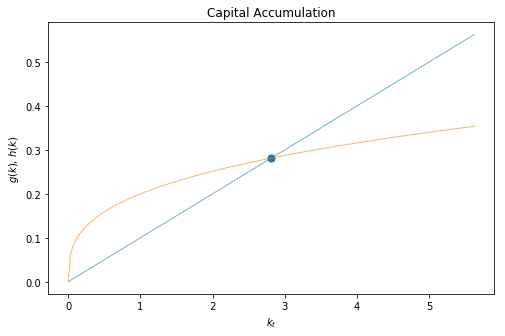

In [10]:
# Plotting Capital Accumulation
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Capital Accumulation')
ax.set_xlabel('$k_{t}$')
ax.set_ylabel('$g(k)$, $h(k)$')
ax.scatter(k_analytic, g(k_analytic), s=50)
ax.plot(k_grid, g(k_grid), lw=1, alpha=0.6)
ax.plot(k_grid, j(k_grid), lw=1, alpha=0.6)
plt.show()

3. Plotting $\{(k, h(k)) \in \mathbb{R}_+^2: h(k) := (1 - \delta)k + sk^\alpha\}$ and $\{(k, z(k)) \in \mathbb{R}_+^2: z(k) := k\}$

    Below we define $h(k)$

In [11]:
h = lambda x: (1 - δ) * x + s * x**α

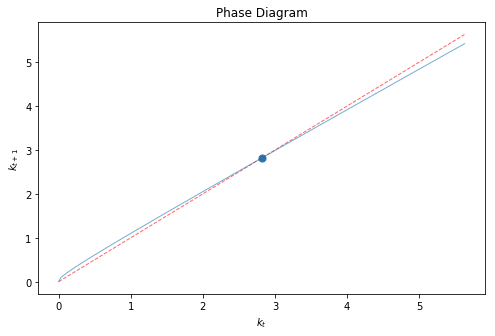

In [12]:
# Plotting Phase Diagram
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Phase Diagram')
ax.set_xlabel('$k_{t}$')
ax.set_ylabel('$k_{t+1}$')
ax.scatter(k_analytic, k_analytic, s=50)
ax.plot(k_grid, k_grid, 'r--', lw=1, alpha=0.6)
ax.plot(k_grid, h(k_grid), lw=1, alpha=0.6)
plt.show()

In [32]:
# Storage space
k_new = np.zeros(k_grid.size)
k_new[0] = 0.01

In [14]:
# Grid and for loop size
time = 80
T = np.linspace(k_min, k_max , time)

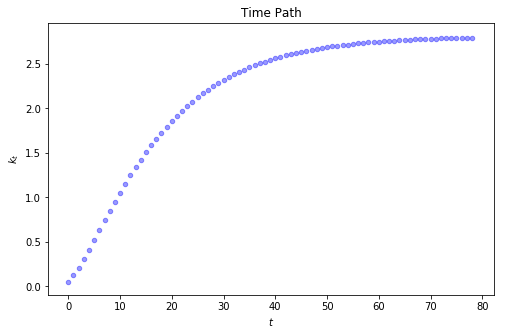

In [15]:
# Plotting time path
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Time Path')
ax.set_xlabel('$t$')
ax.set_ylabel('$k_t$')

for t in range(T.size - 1):
    
    k_new[t + 1] = h(k_new[t])
    ax.scatter(t, k_new[t + 1], color='b', s=20, lw=1, alpha=0.4)
    
plt.show()

The Solow-Swan has an equilibrium map $k_t \rightarrow h(k_t)$ that is strictly concave in $k_t$. This comes from the fact that the production function is concave itself. The production function is constructed to be concave since we wish it to exhibit diminishing marginal returns to capital. This property imploes than an economy far away from its steady state equilibrium will be growing faster but that growth rate converges monotonically to zero as it approaches the steady state.

#### Exercise 1

Autoregressive Time Series -- AR(1) Model

A lot of macroeconomics involves recursive representations of functions. The autoregressive model with one lag variable is a good example of this type of function. The AR(1) model is given by:

$$Y_{t + 1} = \rho Y_t + \sigma w_{t + 1}$$

Where $w_t \sim N(0,1)$, $\rho \in (0,1)$ and $\sigma \in (0, \infty)$. Accoriding to this mapping, the current state $Y_t$ together with a realisation for the random variable $w_{t + 1}$ will produce the realisation of the random state $y_{t + 1}$ next period.

1. Derive the impulse response or infinite moving-average representation of this model. Interpret your result.
2. Suppose $Y_0 = 0$, $w_0 = 1$ and $w_t = 0$ for all $t > 0$. Write a Python function for plotting the sequence $\{Y_t\}_{t=0}^{T}$, where $T = 30$. Assume $\rho = 0.80$ and $\sigma = 0.05$.
3. Now adapt your function Step 2 above for simulating a very long series of realisations of $Y_t$. 
    Plot the histogram of your sample. 
    Comment on your result. 

#### Answers
1. Our AR(1) process is a function such that $Y_{t + 1} = T(Y_t)$, this means we can re-write this function by applying the function to the argument itself, this is known as recursive substitution:

    $$Y_{t + 1} = T(T(y_{t - 1}))$$ 

    This is equivalent to writing:
    
   $$Y_{t + 1} = \rho(\rho Y_{t - 1} + \sigma w_t) + \sigma w_{t + 1}$$
   
   $$Y_{t + 1} = \rho^2 Y_{t - 1} + \rho \sigma w_t + \sigma w_{t + 1}$$
   
   We can continue this until we get:
   
   $$Y_{t + 1} = \rho^k Y_{t - k + 1} + \sigma(\rho^{k - 1} w_{t - k + 2} + ... + \rho w_{t} + w_{t + 1})$$
   
   This becomes:
   
   $$Y_{t} = \rho^k Y_{t - k + 1} + \sigma \sum_{j=0}^{k - 1} \rho^j w_{t - j}$$
   
   The marginal impact of a shock in date-$1$ on the variable $Y_2$ is $\sigma \times \rho$. More generally, for this model we have:
   
   $$\frac{dY_t}{dw_{t - j}} = \sigma \times \rho^j$$
   
   Since $|\rho| < 1$, $\lim_{k \rightarrow \infty} \rho^k Y_{t - k + 1} = 0$, therefore:
   
   $$Y_{t} = \sigma \sum_{j=0}^{\infty} \rho^j w_{t - j}$$
   
   Which is MA($\infty$)
   
   Note that the influence of a shock from the past, $w_{t - j}$ on $Y_{t}$ decays by the factor of $\rho^j \in (0, 1)$.
   
   This result is important in the theory of linear time series, it leads to an important theorem, the Wold Decomposition (Representation) Theorem. This theorem, briefly stated, says that any mean zero convariance stationary process can be represented as an MA($\infty$) process.

2. This problem provides a good opportunity to both understand the idea behind a covariance stationary process as well as have a good code work flow

    The work flow here is as follows:
    - First provide the parameters
    - Create a grid for the plot
    - Write the time series function
    - Plot the time series

In [16]:
# Parameters
T = 30
ρ = 0.80
σ = 0.05

In [17]:
# Grid
grid_min = 0.0
grid_max = 30
grid = np.linspace(grid_min, grid_max, T)

Two points to note here: the function `grid = np.linspace(grid_min, grid_max, T)` has not had its arguments hard coded, `grid_min`, `grid_max` and `T` have all been specified outside the function. This is a good practice to get into the habit of doing, it will ease the debugging process.

In [18]:
# Time Series function
def ts(T):
    
    # Storage Space
    y = np.zeros(T.size)
    
    # Specifying the first value
    w[0] = 1.0
    y[0] = 0.0
    
    for t in range(T.size - 1):
        y[t + 1] = ρ * y[t] + σ * w[t]
        
    return y

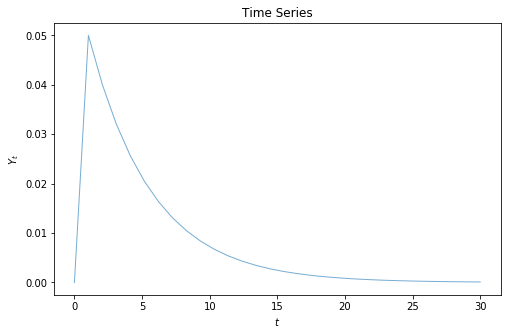

In [19]:
# Plotting the Time Series
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Time Series')
ax.set_xlabel('$t$')
ax.set_ylabel('$Y_{t}$')
ax.plot(grid, ts(grid), lw=1, alpha=0.6)
plt.show()

We can see here that the impact of the shock reduces over time, it is precisely this property that allows for a time series to be covariance stationary. In the context of the AR(1) model, this occurs when $|\rho|<1$

In [20]:
# Parameters
T = 1000
ρ = 0.80
σ = 0.05

In [21]:
# Grid
grid_min = 0.0
grid_max = 30
grid = np.linspace(grid_min, T, T)

In [22]:
# Time Series function
def AR1(T):
    
    # Storage Space
    y = np.zeros(T.size)
    
    # Specifying the first va
    y[0] = 0.0
    
    for t in range(T.size - 1):
        y[t + 1] = ρ * y[t] + σ * np.random.randn(1)
        
    return y

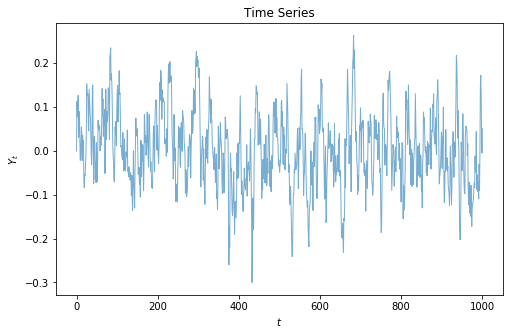

In [23]:
# Plotting the Time Series
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Time Series')
ax.set_xlabel('$t$')
ax.set_ylabel('$Y_{t}$')
ax.plot(grid, AR1(grid), lw=1, alpha=0.6)
plt.show()

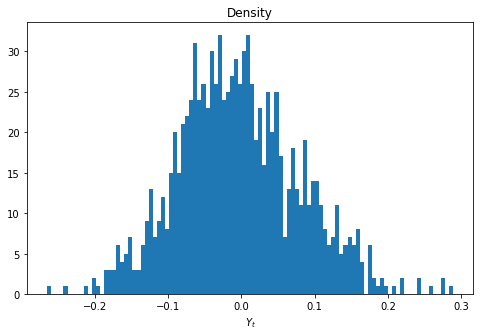

In [24]:
# Plotting the histogram
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Density')
ax.set_xlabel('$Y_{t}$')
plt.hist(AR1(grid), bins=100)
plt.show()

Theoretically, since the shocks are Gaussian, the long-run distribution of the stochastic process will be Gaussian. In fact, its unconditional distribution is $N(0, \sigma^2/1 - \rho^2)$

#### Exercise 2

The Solow-Swan growth model.

Assume $\delta = 0$

1. Now suppose that $\ln(A_t)$ follows the parametric instance of the AR(1) model. Derive the dynamic equilibrium condition of this stochastic version of the Solow-Swan model
2. Simulate a sample of length $T = 200$ outcomes of the random variable $A_t$
3. Plot the graph of $sAk^\alpha$ in $(k_t, k_{t + 1})$ space, where $A = 1$ (i.e. the non-stochastic steady-state of $A_t$). Note that for each realisation of $A_t \neq A$ there is a corresponding graph of a production function. Plot the path of $k_t$ for a sufficiency long sample size of your choosing.
4. Comment on your results.

    Observe that the random outcome of $k_t$ over time fluctuates around the deterministic steady-state equilibrium map (i.e. same graph from previous exercise), as $T \rightarrow \infty$. Because of shocks $A_t$ to the production function every period, the long run of this economy no longer settles on a single deterministic steady state point. But it appears that the long run stochastic dynamics will be distributed around the deterministic steady state according to some fixed distribution. 
    
    In higher level macroeconomics, our equilibrium concept is less steady state fixed points and more stationary distributions.

#### Answers

1. In this exercise, we are supposing that the shocks to production evolve according to the following process:

$$\ln(A_t) = \rho \ln(A_{t - 1}) + \sigma W_t$$

   Where $W \sim N(0, 1)$, $\sigma \in (0, \infty)$ and $\rho \in (0, 1)$

   Since $|\rho| < 1$, $\lim_{k \rightarrow \infty} \rho^k \ln(A_{t - k + 1}) = 0$, therefore:
   
   $$\ln(A_{t}) = \sigma \sum_{j=0}^{\infty} \rho^j w_{t - j}$$

   Since $w_{t}$ is i.i.d. in steady state:
   
   $$\ln(A_t) \sim N(0, \sigma^2/1 - \rho^2)$$ 
   
   Since $\sum_{j=0}^{\infty}\rho^j = \frac{1}{1 - \rho}$, because it is a geometric series

In [25]:
# Parameters
δ = 0.0
T = 200

In [26]:
# Grid
grid = np.linspace(grid_min, grid_max, T)

# Storage space and first realisation of A
A = np.zeros(grid.size)
A[0] = 1.0

In [27]:
# The production function
f = lambda x, A: s * A * x**α

In [28]:
for t in range(grid.size - 1):
    
    # Generating a realisation of the random variable
    w = np.random.randn(1)
    
    A[t + 1] = np.exp(ρ * np.log(A[t]) + σ * w)

2. This `for` loop generates the 200 realisations of the random variable $A$

3. Below we plot the two production functions, the first with different realisations of $A$, the second where $A = 1$. We can see that the stochastic version of production function moves about the deterministic production function

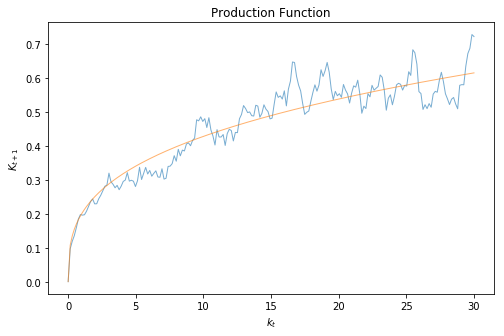

In [29]:
# Plotting the Production Function
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Production Function')
ax.set_xlabel('$k_t$')
ax.set_ylabel('$K_{t+1}$')
ax.plot(grid, f(grid, A), lw=1, alpha=0.6)
ax.plot(grid, f(grid, A=1.0), lw=1, alpha=0.6)
plt.show()

#### Extension

Re-run the code segment above, experimenting with $T=20$, $T=100$, $T=200$ and $T=500$, what do you observe?

In [30]:
T = np.array([20, 100, 200, 500])

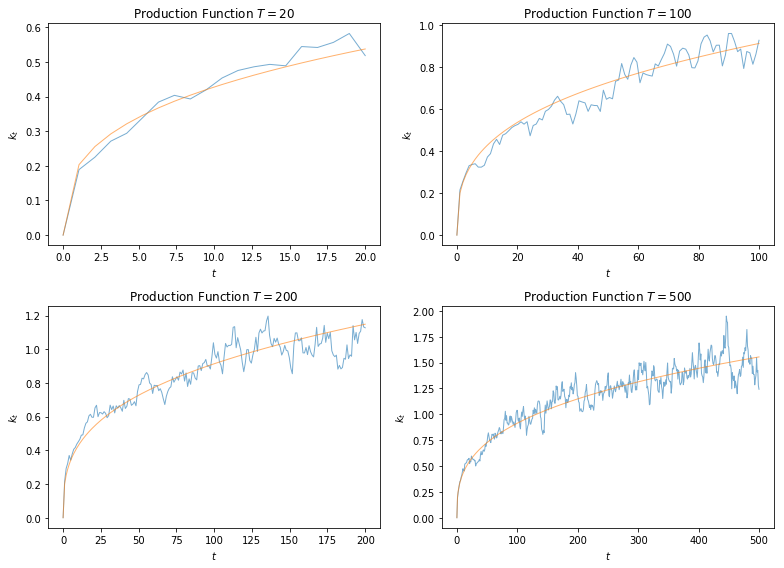

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(11, 8))
axes = axes.flatten()

for i, j in enumerate(T):
    
    ax = axes[i]
    axes[i].set_title('Production Function $T =$' + str(j))
    ax.set_xlabel('$t$')
    ax.set_ylabel('$k_{t}$')
    
    grid = np.linspace(grid_min, j, j)
    A = np.zeros(grid.size)
    A[0] = 1.0
    
    for t in range(grid.size - 1):
        w = np.random.randn(1)
        A[t + 1] = np.exp(ρ * np.log(A[t]) + σ * w)
        
    ax.plot(grid, f(grid, A), lw=1, alpha=0.6)
    ax.plot(grid, f(grid, A=1.0), lw=1, alpha=0.6) 
    
plt.tight_layout()
plt.show()

Then can you prove that if the underlying shock (in logarithms) is Gaussian, then the long run distribution of $\ln(k)$ is also Normal?

Since we have that $W \sim N(0, 1)$, we know that $\ln(A) \sim N\left(0, \frac{\sigma^2}{(1 - \rho^2)}\right)$

The steady of capital is:

$$k = \left(\frac{sA}{\delta}\right)^{\frac{1}{1 - \alpha}}$$

Taking the log of both sides:

$$\ln(k) = \frac{1}{1 - \alpha}\left[\ln\left(\frac{s}{\delta}\right) + \ln(A)\right]$$ 

We can see from this that $\ln(k) \sim N\left(\frac{1}{1 - \alpha}\ln\left(\frac{s}{\delta}\right), \frac{\sigma^2}{(1 - \rho^2)(1 - \alpha)^2} \right)$

